In [69]:
import pandas as pd 
from scipy import stats 
data = pd.read_csv(r"C:\Users\lera\Downloads\ab_test_data.csv")
data.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [49]:
data.groupby("test_group").describe() 

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

In [89]:
# Підрахунок користувачів і конверсій
info = data.groupby('test_group').agg(
    users=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()
info['conversion_rate'] = info['conversions'] / info['users']

# Вивід результатів
print("\nКількість користувачів та конверсій у групах:")
print(info)


Кількість користувачів та конверсій у групах:
  test_group  users  conversions  conversion_rate
0          a  10013          611         0.061021
1          b   9985          889         0.089034


In [77]:
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'])

# Визначення дати початку, кінця та тривалості тесту
test_start = data['timestamp'].min()
test_end = data['timestamp'].max()
test_duration = (test_end - test_start).days

print(f"Дата початку тесту: {test_start}")
print(f"Дата завершення тесту: {test_end}")
print(f"Тривалість тесту: {test_duration} днів")

Дата початку тесту: 2023-07-03 01:42:34.033708
Дата завершення тесту: 2023-07-25 01:41:19.152664
Тривалість тесту: 21 днів


In [91]:
group_a = data[data['test_group'] == 'a']['conversion']
group_b = data[data['test_group'] == 'b']['conversion']

# Виконуємо t-тест
alpha = 0.05
statistic, pvalue = stats.ttest_ind(group_a, group_b, alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('Відхиляємо нульову гіпотезу')
else:
    print('Не відхиляємо нульову гіпотезу')

t-statistic: -7.53, p-value: 0.0
Відхиляємо нульову гіпотезу


C:\Users\lera\AppData\Local\Temp\ipykernel_2700\1971742378.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='test_group', y='conversion_rate', data=summary, ci=95, palette=["#5d6d7e", "#d5d8dc"])
C:\Users\lera\AppData\Local\Temp\ipykernel_2700\1971742378.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_group', y='conversion_rate', data=summary, ci=95, palette=["#5d6d7e", "#d5d8dc"])


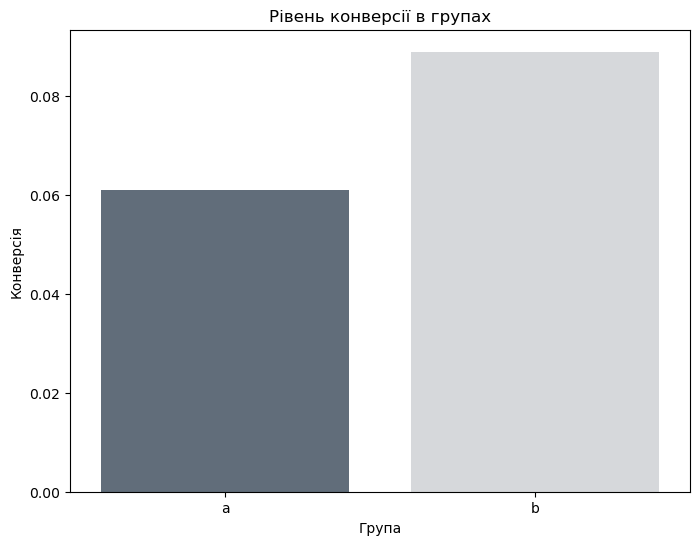

In [95]:
# 3. Візуалізація рівня конверсії з 95% ДІ
summary = data.groupby('test_group').agg(
    users=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()
summary['conversion_rate'] = summary['conversions'] / summary['users']

plt.figure(figsize=(8, 6))
sns.barplot(x='test_group', y='conversion_rate', data=summary, ci=95, palette=["#5d6d7e", "#d5d8dc"])
plt.title("Рівень конверсії в групах")
plt.ylabel("Конверсія")
plt.xlabel("Група")
plt.show()

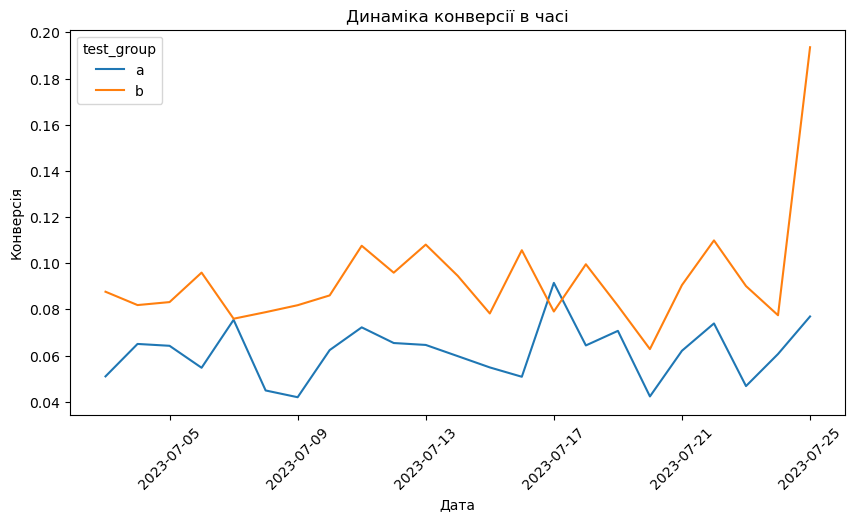

In [81]:
#Графік зміни конверсії в часі
if 'timestamp' in data.columns:
    data['date'] = data['timestamp'].dt.date
    conversion_trend = data.groupby(['date', 'test_group']).agg(conversions=('conversion', 'sum'), users=('user_id', 'count'))
    conversion_trend['conversion_rate'] = conversion_trend['conversions'] / conversion_trend['users']
    conversion_trend = conversion_trend.reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=conversion_trend, x='date', y='conversion_rate', hue='test_group')
    plt.title("Динаміка конверсії в часі")
    plt.ylabel("Конверсія")
    plt.xlabel("Дата")
    plt.xticks(rotation=45)
    plt.show()